# **Bank Marketing Campaign**

# **Flow of the Project**

 **Data Collection & Importing**

 **Data Cleaning**

 **Data Transformation**

 **Descriptive Statistics**

 **Important Feature Analysis**

 **Data driven Strategies**

 **Model Building**

 **Model evaluation**

 **Monte carlo simulation**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# **Data Loading and Exploratory Data Analysis (EDA)**

In [3]:
df = pd.read_csv('/content/bank (2).csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df.shape

(11162, 17)

In [8]:
null_counts = df.isnull().sum()
print(null_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


## **Feature Importance Analysis and Data-Driven Insights for Decision** **Making**

Feature Importance (Mutual Information):
duration               0.155715
poutcome_success       0.052236
balance                0.046591
pdays                  0.038218
contact_unknown        0.036921
age                    0.030366
housing_yes            0.028718
contact_cellular       0.028702
poutcome_unknown       0.025039
day                    0.021417
housing_no             0.021100
previous               0.018609
month_mar              0.016789
campaign               0.012892
job_student            0.012860
month_oct              0.012772
month_feb              0.012488
job_retired            0.009914
loan_yes               0.009828
education_unknown      0.008592
default_no             0.008239
marital_single         0.008236
month_dec              0.007571
month_sep              0.007347
month_may              0.005970
job_blue-collar        0.005528
month_aug              0.005225
month_jan              0.004892
marital_married        0.004809
job_housemaid          0.004522

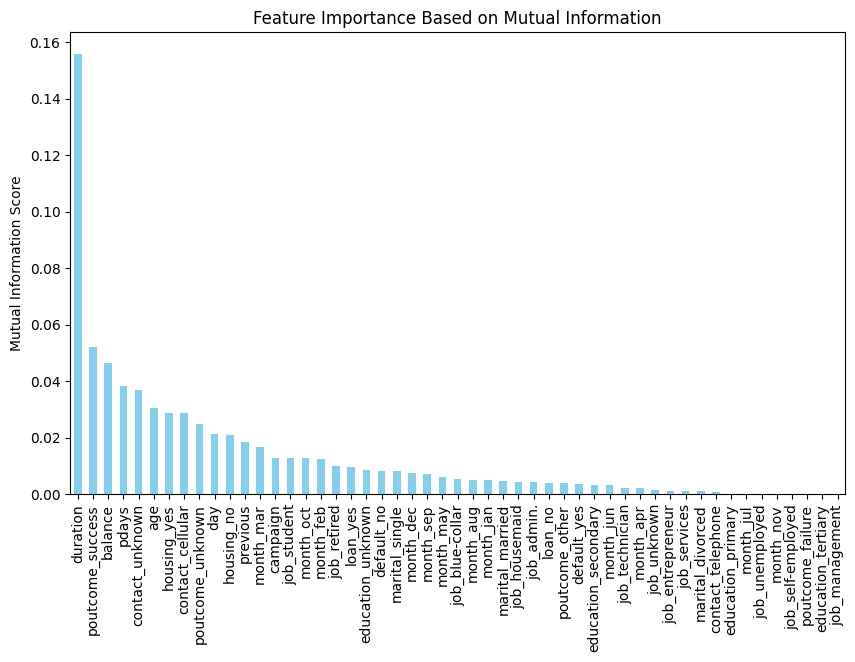

In [9]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

# Define features and target
X = df.drop('deposit', axis=1)
y = df['deposit']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder to the categorical features and transform them
encoded_data = encoder.fit_transform(X.select_dtypes(include=['object'])) # Select only categorical features

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns))

# Concatenate the encoded features with the numerical features
X_encoded = pd.concat([X.select_dtypes(exclude=['object']), encoded_df], axis=1)

# Compute mutual information using the encoded data
mutual_info = mutual_info_classif(X_encoded, y, random_state=42)

# Create a DataFrame for feature importance
mi_series = pd.Series(mutual_info, index=X_encoded.columns).sort_values(ascending=False)

print("Feature Importance (Mutual Information):")
print(mi_series)

# Visualize the importance
mi_series.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Feature Importance Based on Mutual Information")
plt.ylabel("Mutual Information Score")
plt.show()

Mutual Information

Calculates the mutual information between each feature and the target variable for classification tasks. Mutual information measures how much information is shared between the feature and the target variable.

**1. duration Analysis**

Objective: Explore how call duration impacts term deposit subscription.

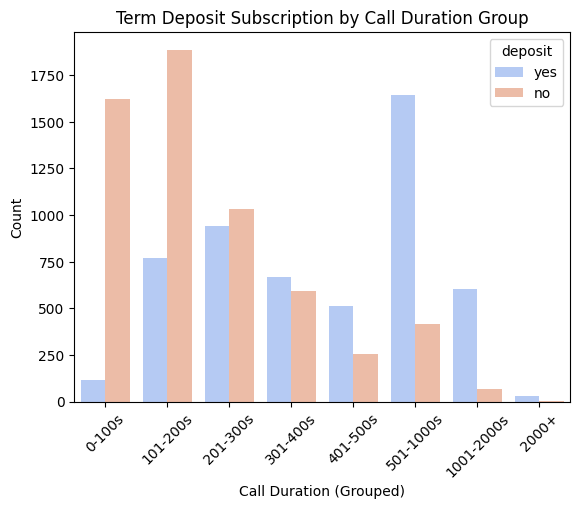

In [10]:
# Create duration bins
df['duration_group'] = pd.cut(df['duration'], bins=[0, 100, 200, 300, 400, 500, 1000, 2000, 4000],
                                labels=['0-100s', '101-200s', '201-300s', '301-400s',
                                        '401-500s', '501-1000s', '1001-2000s', '2000+'])

# Plot count plot
sns.countplot(data=df, x='duration_group', hue='deposit', palette='coolwarm')
plt.title("Term Deposit Subscription by Call Duration Group")
plt.xlabel("Call Duration (Grouped)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Suggestion:**

Focus on improving the quality of customer calls. Invest in training agents to engage customers effectively for longer durations.

**2. poutcome_success Analysis**

Objective: Analyze the impact of successful outcomes in previous campaigns.

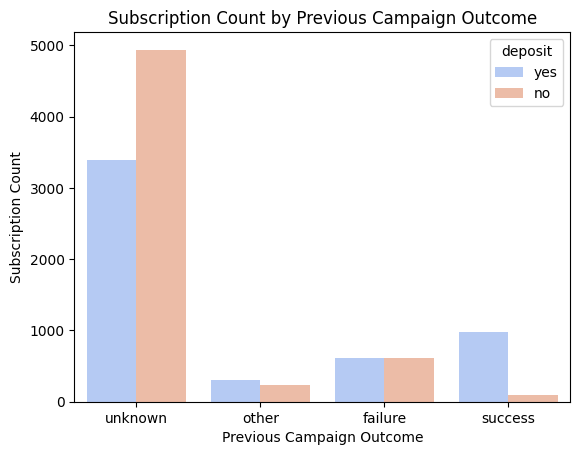

In [11]:
sns.countplot(data=df, x='poutcome', hue='deposit', palette='coolwarm')
plt.title("Subscription Count by Previous Campaign Outcome")
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Subscription Count")
plt.show()


**Suggestion:**

Re-engage customers who responded positively in past campaigns with targeted offers and personalized communication.

**3. balance Analysis**

Objective: Study the relationship between account balance and subscription likelihood.

<ipython-input-12-d9cbacf15430>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='deposit', y='balance', palette='coolwarm')


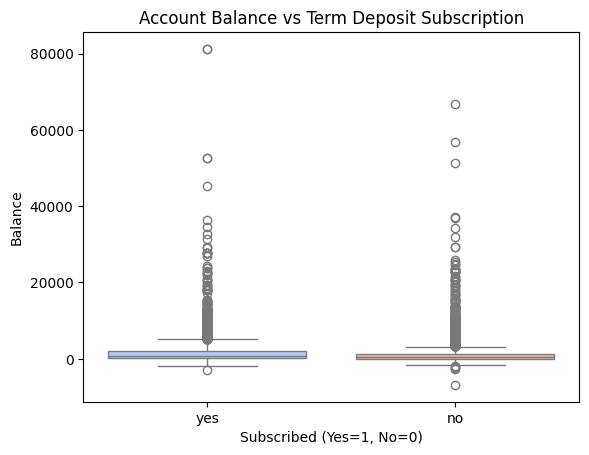

In [12]:
sns.boxplot(data=df, x='deposit', y='balance', palette='coolwarm')
plt.title("Account Balance vs Term Deposit Subscription")
plt.xlabel("Subscribed (Yes=1, No=0)")
plt.ylabel("Balance")
plt.show()


**Suggestion:**

Offer premium services or incentives to customers with higher account balances, as they are more likely to subscribe.

**4. pdays Analysis**

Objective: Examine how the recency of contact impacts subscription.



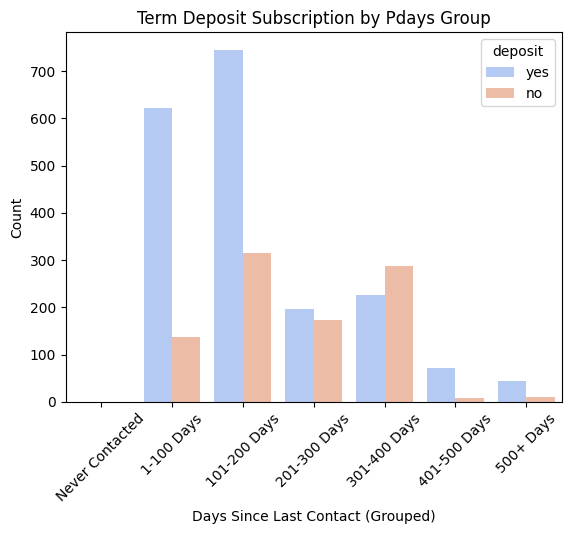

In [13]:
# Create pdays bins
df['pdays_group'] = pd.cut(df['pdays'], bins=[-1, 0, 100, 200, 300, 400, 500, 1000],
                             labels=['Never Contacted', '1-100 Days', '101-200 Days',
                                     '201-300 Days', '301-400 Days', '401-500 Days', '500+ Days'])

# Plot count plot
sns.countplot(data=df, x='pdays_group', hue='deposit', palette='coolwarm')
plt.title("Term Deposit Subscription by Pdays Group")
plt.xlabel("Days Since Last Contact (Grouped)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Suggestion:**

Develop a strategy to follow up with customers sooner after previous contact, as recency drives engagement.


**5. contact_cellular and contact_unknown Analysis**

Objective: Compare the effectiveness of different contact methods.

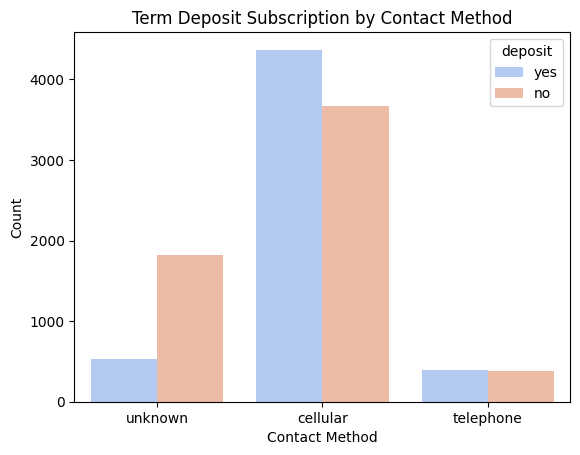

In [14]:
sns.countplot(data=df, x='contact', hue='deposit', palette='coolwarm')
plt.title("Term Deposit Subscription by Contact Method")
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.show()


**Suggestion:**

Focus on using cellular communication for campaigns, as it has proven to be effective.
Reduce reliance on "unknown" contact methods and improve customer data collection.

 **Age Analysis**

Objective: Analyze how age influences term deposit subscriptions.

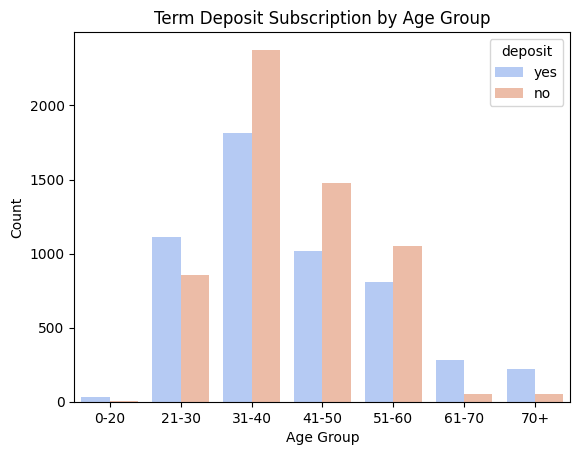

In [15]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100],
                           labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Plot count plot
sns.countplot(data=df, x='age_group', hue='deposit', palette='coolwarm')
plt.title("Term Deposit Subscription by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


**Suggestion:**

If specific age groups show higher subscription rates, tailor marketing efforts (e.g., personalized offers or language) for those demographics.

**Housing Loan Analysis**

Objective: Study how having a housing loan impacts subscription likelihood.

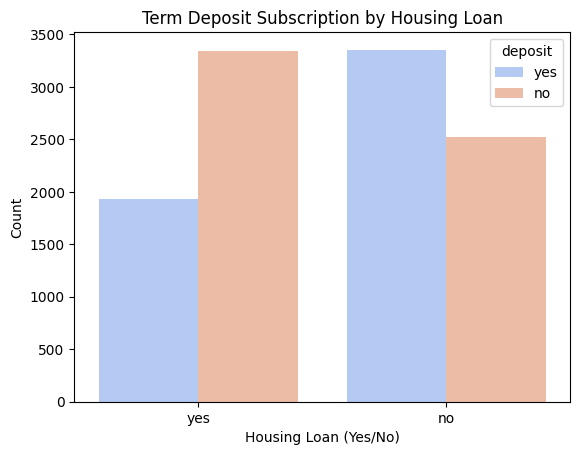

In [16]:
sns.countplot(data=df, x='housing', hue='deposit', palette='coolwarm')
plt.title("Term Deposit Subscription by Housing Loan")
plt.xlabel("Housing Loan (Yes/No)")
plt.ylabel("Count")
plt.show()



**Suggestion:**

For customers with housing loans, offer bundled financial products that complement their existing commitments.

People without housing loans are more likely to subscribe than those with housing loans, which could suggest financial constraints or priorities associated with housing loans affecting subscription behavior.

**Job Analysis**

Objective: Examine how occupation impacts subscription likelihood.

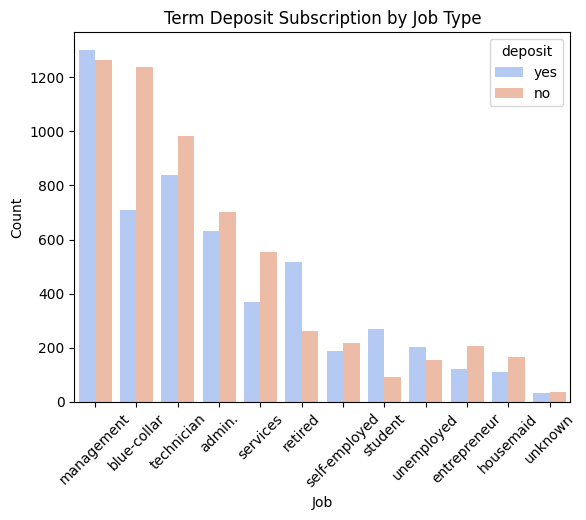

In [17]:
sns.countplot(data=df, x='job', hue='deposit', palette='coolwarm', order=df['job'].value_counts().index)
plt.title("Term Deposit Subscription by Job Type")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Suggestion:**
Focus on occupations with higher subscription rates to refine target audience for future campaigns.

For low-performing job categories, customize marketing strategies or address specific concerns (e.g., affordability).

**Combined Insights and Recommendations**

Age:

Identify target age groups for personalized marketing.
Consider offering age-specific term deposit schemes.

Housing:

For customers with housing loans, position term deposits as a complementary investment for financial stability.
For those without housing loans, promote deposits as a savings mechanism for future goals (e.g., buying a house).

Job:

Tailor campaigns based on job profiles. For instance, retirees might be interested in secure savings, while students may respond to short-term savings plans.

# **Insights Summary**

**Duration:** Longer call durations correlate strongly with higher subscription rates. Prioritize engaging customers during calls to maximize effectiveness.

**Poutcome**: Customers who had a successful outcome in a previous campaign are more likely to subscribe. Target these customers in future campaigns.

**Age:** Certain age groups (e.g., retirees or younger demographics) are more likely to subscribe. Customize offers based on age profiles.

**Housing**: Customers without housing loans show a slight inclination towards term deposit subscriptions. Tailor offers accordingly.

# **Model Development Focused on Significant Features**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [20]:
# Step 4: Select only important features (with MI > 0)
important_features = mi_series[mi_series > 0].index  # Features with non-zero importance
X_important = X_encoded[important_features]

# Step 5: Split the important features into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Step 6: Scale the features (optional, highly recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# **Model Evaluation**

In [21]:
# Evaluate the model (optional: include additional metrics)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

Training Accuracy: 0.83
Test Accuracy: 0.81


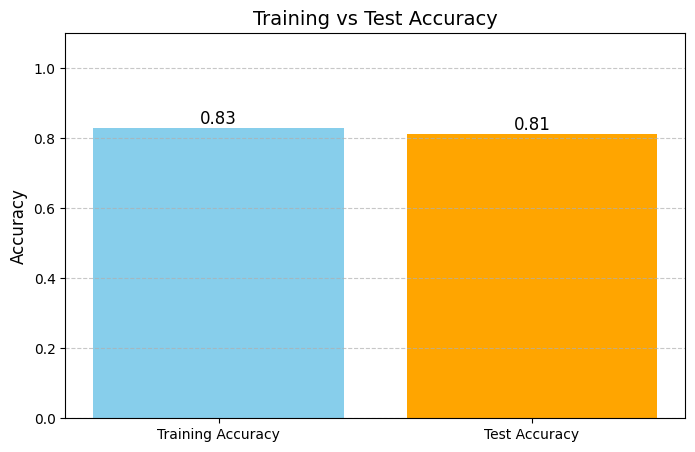

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the training and test accuracy
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Prepare data for plotting
scores = [train_score, test_score]
labels = ['Training Accuracy', 'Test Accuracy']

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=['skyblue', 'orange'])

# Annotate the bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title('Training vs Test Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The model achieves a training accuracy of 83% and a test accuracy of 81%, indicating it has generalized well to unseen data. The minimal 2% gap suggests the model effectively captures the patterns in the dataset without overfitting. This performance is appropriate for predicting the likelihood of a customer making a deposit based on the given features, making it a reliable tool for the task

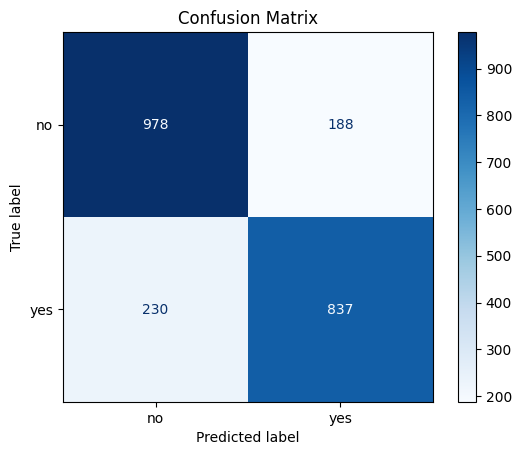

Classification Report:
              precision    recall  f1-score   support

          no       0.81      0.84      0.82      1166
         yes       0.82      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

# **Generated Recommendations**

Based on the analysis and model results, provide actionable business recommendations to the bank,

such as:

**++**Focus on customers with longer call durations.

**++**Retarget customers with previous successful campaign outcomes.

**++**Segment and target specific age groups or occupations.

**++**Design marketing strategies based on identified key features.

# **Monte Carlo Simulation**

It uses random sampling to model the range of outcome

Integrated Monte Carlo Simulation to evaluate variability and risks in subscription predictions, enabling more robust and risk-aware marketing strategy under uncertain conditions.

In [24]:
#'model' is our trained logistic model and 'X_test' is your test data
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class


In [25]:
# Define the number of simulations
n_simulations = 1000

# Perform Monte Carlo Simulation
monte_carlo_results = np.random.binomial(1, y_prob, size=(n_simulations, len(y_prob)))

In [26]:
# Calculate average subscription rate across all simulations
mean_subscription_rate = monte_carlo_results.mean(axis=1)

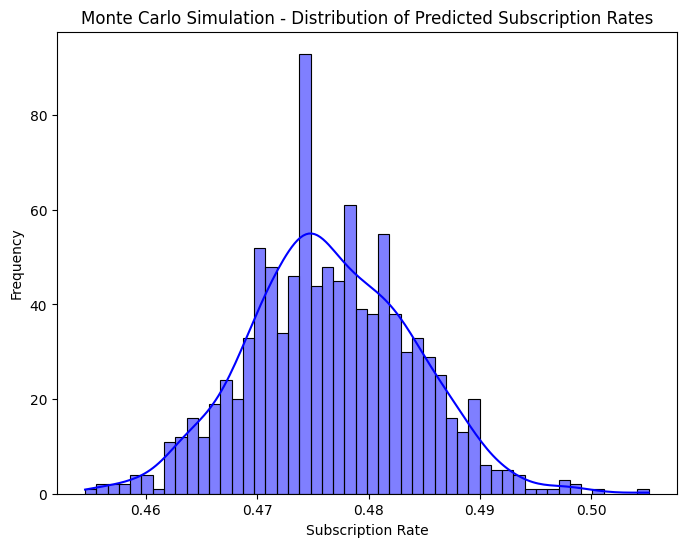

In [29]:

# Plot the distribution of the subscription rates
plt.figure(figsize=(8, 6))
sns.histplot(mean_subscription_rate, bins=50, kde=True, color='blue')
plt.title('Monte Carlo Simulation - Distribution of Predicted Subscription Rates')
plt.xlabel('Subscription Rate')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Summary statistics
print(f"Mean predicted subscription rate: {mean_subscription_rate.mean():.4f}")
print(f"95% confidence interval: {np.percentile(mean_subscription_rate, [2.5, 97.5])}")

Mean predicted subscription rate: 0.4766
95% confidence interval: [0.46260636 0.49081953]


This output suggests that while your model predicts a mean subscription rate of around 47%, there’s a 95% chance the true rate is somewhere between 46% and 49%